In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


from the above method we have imported our file into python.

## Exploratory Data Analysis (EDA) 

In [4]:
df.shape

(7043, 21)

From the above shape method we can see that we have 7043 rows and 21 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above info method it is displaying that we have object data and some are numrical data ,so have to treat object data as per requirement.

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above descrive.Transpose method we can see that count value of every columns is equal so no any chances of missing value in dataset.

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

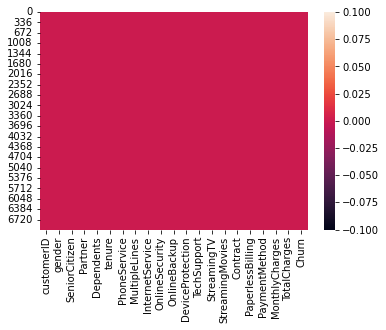

In [9]:
sns.heatmap(df.isnull())
plt.show()

Awesome , our dataset have no missing value.

In [10]:
df.nunique().to_frame('unique values')

,unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


From this unique method we can see that customerID is just an ID . it will not help in prediction of our target or label . so we have to drop it here.

In [11]:
df.drop('customerID',axis=1, inplace=True)

In [12]:
df.shape

(7043, 20)

We have dropped customerID column. now we have 20 columns.

In [13]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

From the above skew method , only SeniorCitizen column has out of acceptable range that is +.5 to -.5, and need to treat well.

In [14]:
#object datatypes
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatype.append(x)
print(object_datatype) 

#numerical datatypes
numerical_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float64':
        numerical_datatype.append(x)
        
print(numerical_datatype) 

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [15]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print('='*120)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: T

Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [17]:
df['TotalCharges']=df['TotalCharges'].replace(" ", "0.0")
df['TotalCharges'].value_counts()

0.0       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Since we saw 11 rows with blank data present in the column "TotalCharges" we have replaced them with the value 0.

In [18]:
df['TotalCharges']=df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

Also column "TotalCharges" even though had all float numbers for some reason it showed as object data type and therefore we are converting it into the float data type now.

In [19]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtype

dtype('O')

Similarly in SeniorCitizen column all values either 0 or 1 so we should keep it into object datatypes.

In [20]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


## Visualization

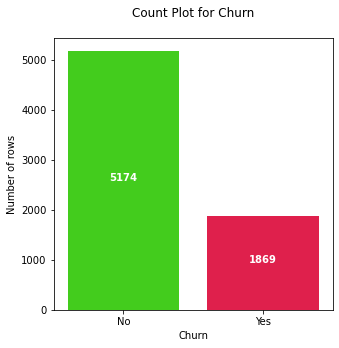

In [21]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Churn'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that "No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.

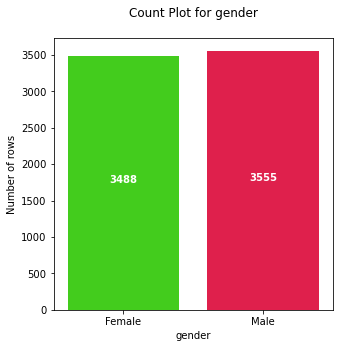

In [23]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'gender'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above count plot we can see that number of Male is little higher than Female.

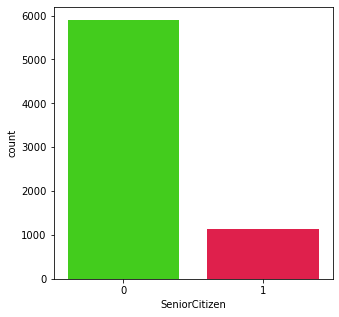

In [24]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'SeniorCitizen'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above plot we can see that 0 is showing no senior citizen that is too high and 1 is showing yes senior citizen thaat is too low as comparision to yes.

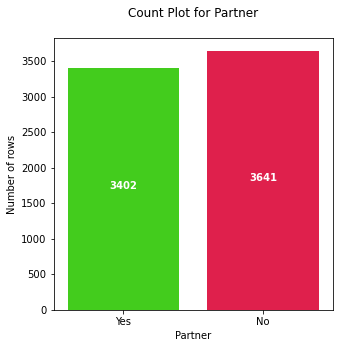

In [25]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Partner'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above plot we can see that customer having partner is 3402 and the customer who has no parter is 3641.

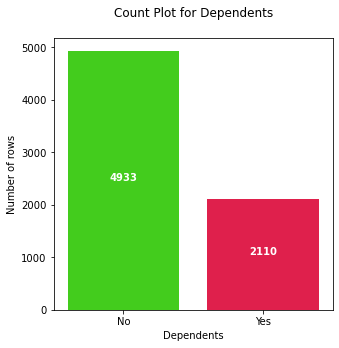

In [26]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Dependents'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

Above plot is showing that the Dependents customer is less as compare to independent customers.

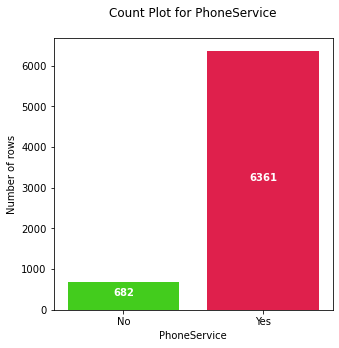

In [27]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PhoneService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot we can say that most of customer is using phone service and only few customer is not using any phone service.

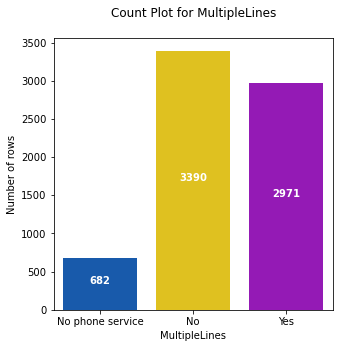

In [28]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'MultipleLines'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot we can see that MultipleLines customer is higher than that of singleLine user but this plot also displaying some customer even don't use any of line connection.

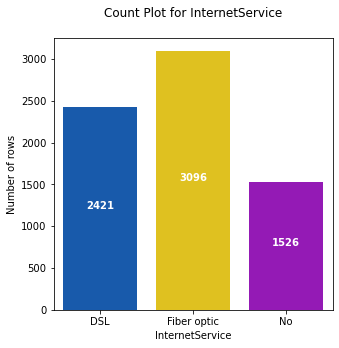

In [29]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'InternetService'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot we can see that we have two sort of internet service, Fiber optic internetservice is used by more customer that DSL and some customer even dont use the internet Service.

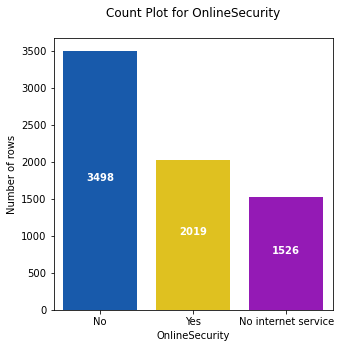

In [30]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineSecurity'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot we can see that people having no internetservice there is no need online security for them even many people having internet connection has no onlinesecurity.

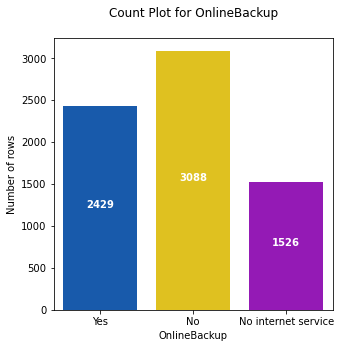

In [31]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineBackup'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above plot we can see that customer having no internetconnection, no need to have online backup and this plot also showing customer having even havinvg internet connection has higher in number than who has online Backup.

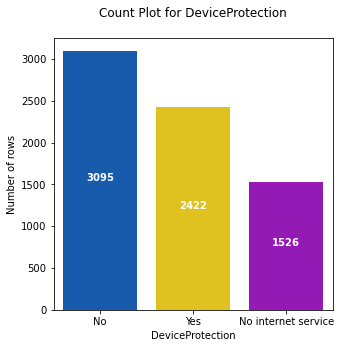

In [32]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'DeviceProtection'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Similary, no internetconnection has no need to have DeviceProtection and in this plot more people has No DeviceProtection than people having DeviceProtection.

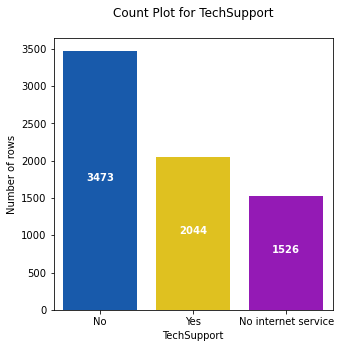

In [33]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'TechSupport'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above plot No internet service has no mean to have any tech support and more people require No tech support than people require support.

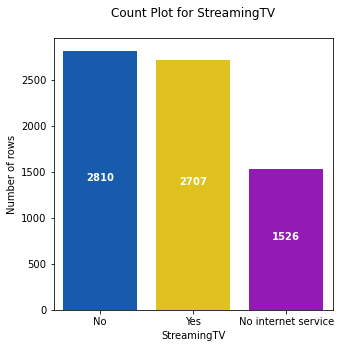

In [34]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingTV'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

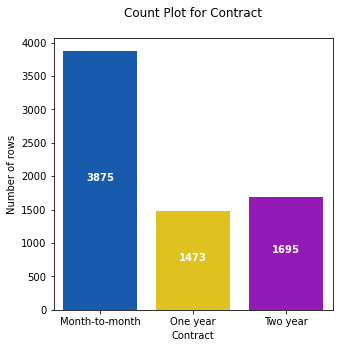

In [35]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Contract'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above plot it is clear that Month to month contractor customer number is very high as compare to one year or two years for contract.

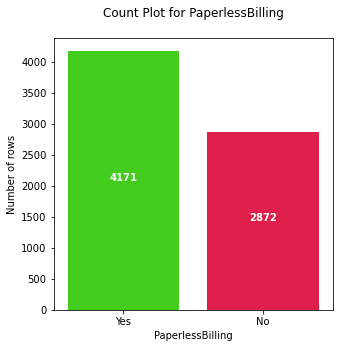

In [36]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaperlessBilling'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above plot it's displaying that No of customer who takes paperBilling as compare to who dont take.

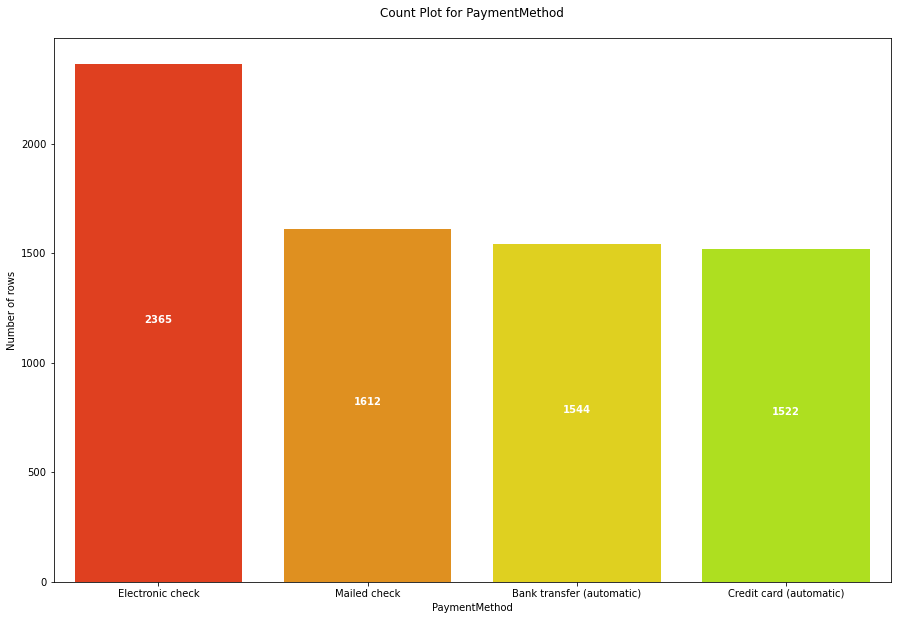

In [37]:
try:
    plt.figure(figsize=(15,10))
    col_name = 'PaymentMethod'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From the above plot we can see thaat more people using Electronic check to payment as compare to other method of payment.

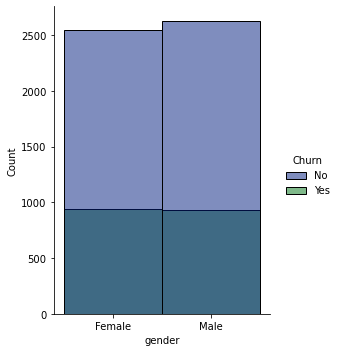

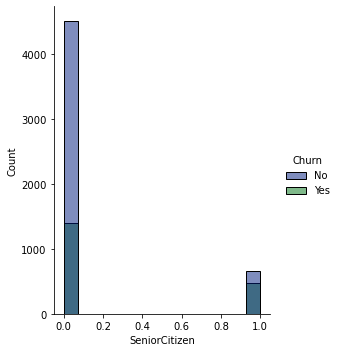

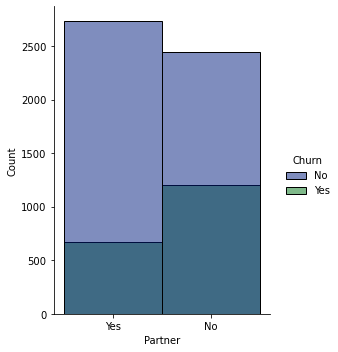

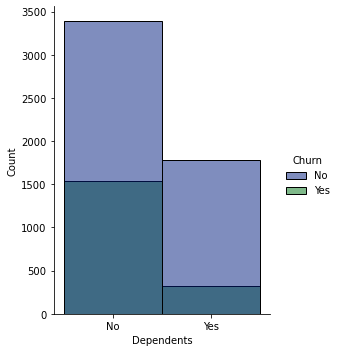

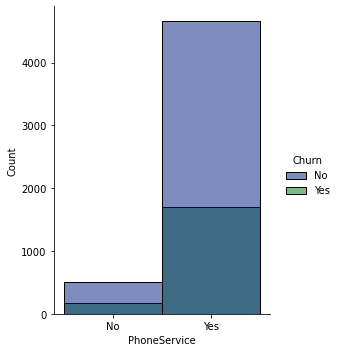

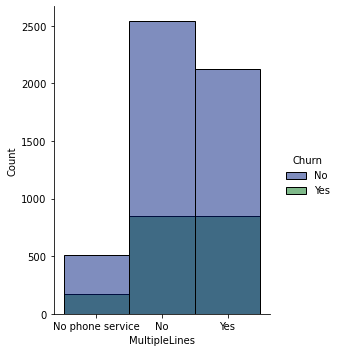

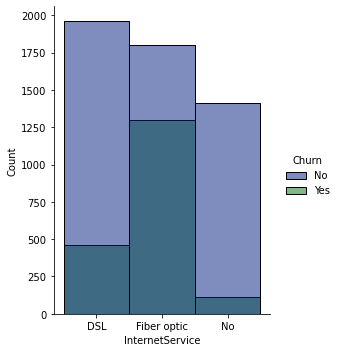

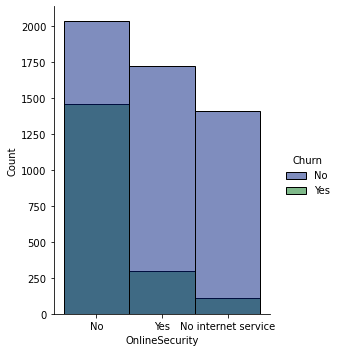

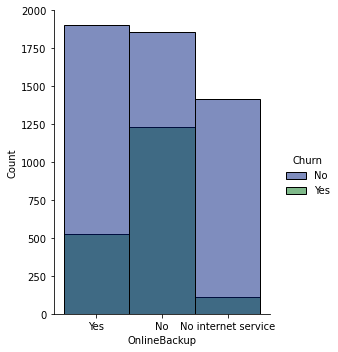

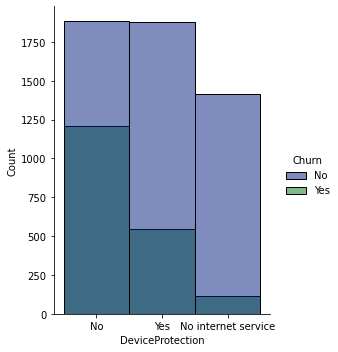

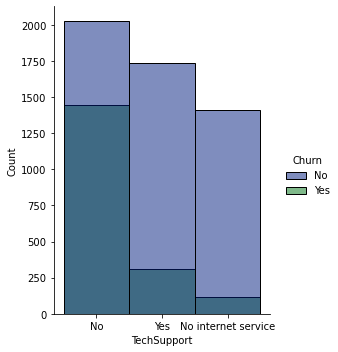

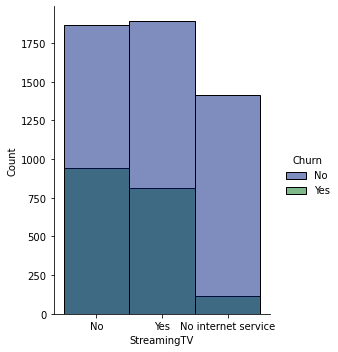

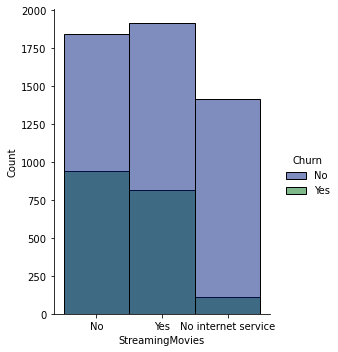

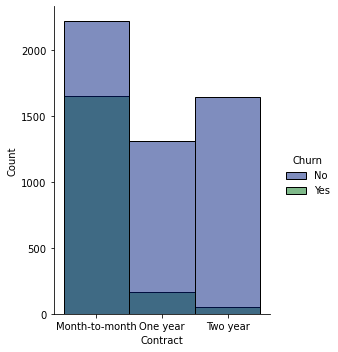

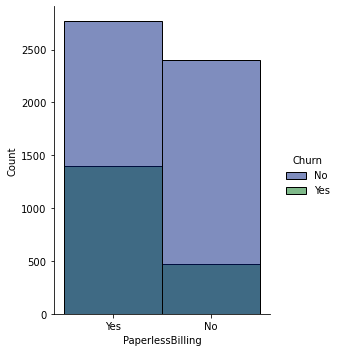

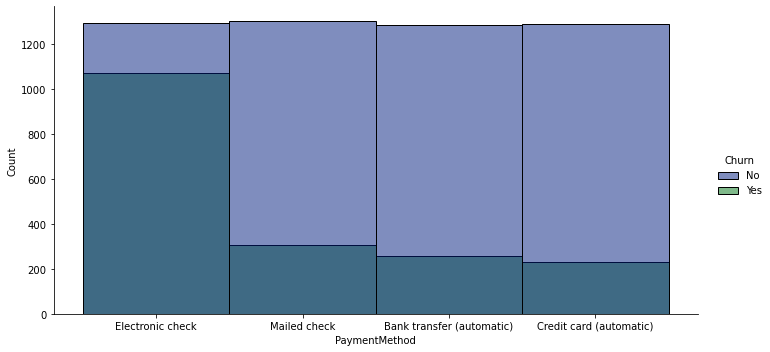

In [38]:
plt.style.use('seaborn-dark-palette')

new_data=object_datatype
new_data.remove('Churn')
new_list=new_data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than it counterpart. However area where it is higher are the pain points that will need to be resolved so that we can continue to retain our customer base.

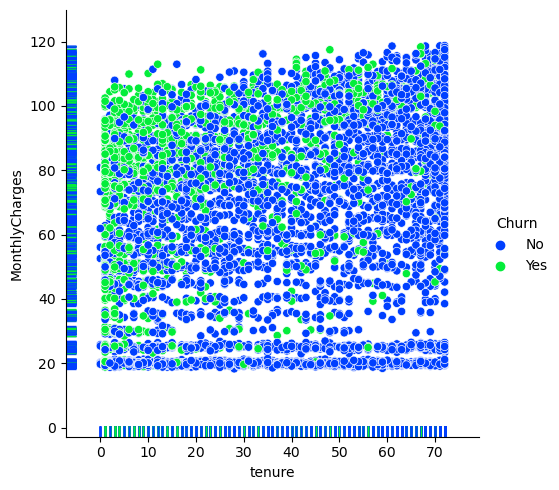

In [39]:
plt.style.use('default')
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)
plt.show()

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

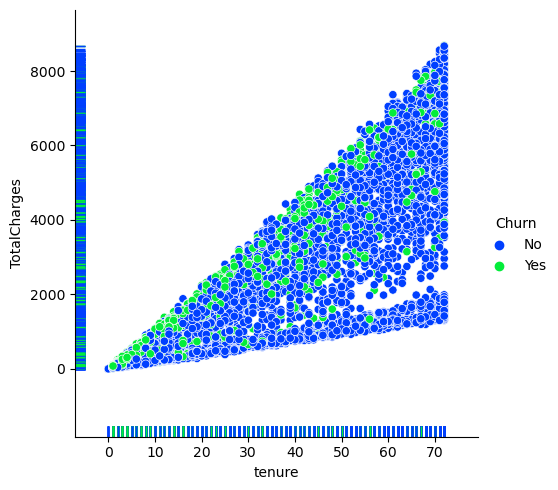

In [40]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)
plt.show()

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

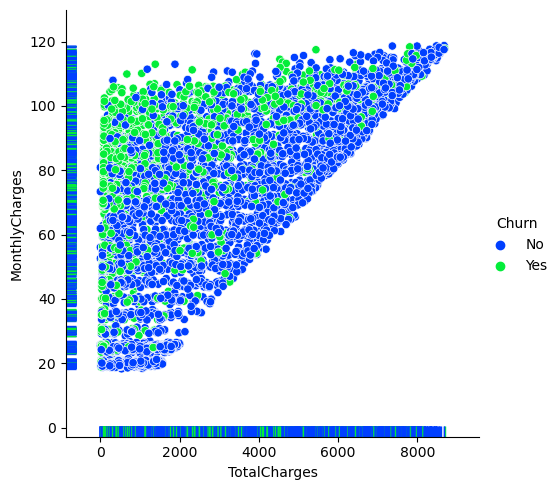

In [41]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)
plt.show()

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

## Encoding the catagorical Object type Data

In [42]:
#Label Encoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [43]:
#Ordinal Encoder
oe=OrdinalEncoder()
df['gender']=oe.fit_transform(df['gender'].values.reshape(-1,1))
df['SeniorCitizen']=oe.fit_transform(df['SeniorCitizen'].values.reshape(-1,1))
df['Partner']=oe.fit_transform(df['Partner'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['PhoneService']=oe.fit_transform(df['PhoneService'].values.reshape(-1,1))
df['MultipleLines']=oe.fit_transform(df['MultipleLines'].values.reshape(-1,1))
df['InternetService']=oe.fit_transform(df['InternetService'].values.reshape(-1,1))
df['OnlineSecurity']=oe.fit_transform(df['OnlineSecurity'].values.reshape(-1,1))
df['OnlineBackup']=oe.fit_transform(df['OnlineBackup'].values.reshape(-1,1))
df['DeviceProtection']=oe.fit_transform(df['DeviceProtection'].values.reshape(-1,1))
df['TechSupport']=oe.fit_transform(df['TechSupport'].values.reshape(-1,1))
df['StreamingTV']=oe.fit_transform(df['StreamingTV'].values.reshape(-1,1))
df['StreamingMovies']=oe.fit_transform(df['StreamingMovies'].values.reshape(-1,1))
df['Contract']=oe.fit_transform(df['Contract'].values.reshape(-1,1))
df['PaperlessBilling']=oe.fit_transform(df['PaperlessBilling'].values.reshape(-1,1))
df['PaymentMethod']=oe.fit_transform(df['PaymentMethod'].values.reshape(-1,1))

In [44]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


In [45]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

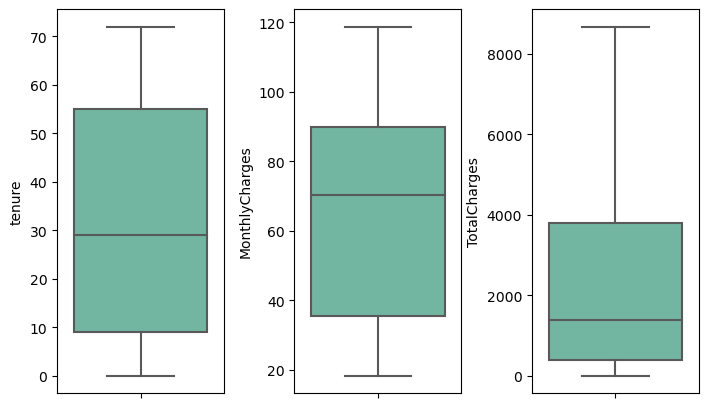

In [46]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

From the above plot we can see that maybe our dataset is free from outliers.

In [47]:
z=np.abs(zscore(df))
threashold=3
df1=df[(z<3).all(axis=1)]
df1.shape, df.shape

((6361, 20), (7043, 20))

In [48]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

9.683373562402386

We have huge row so we should ahead with this loss.

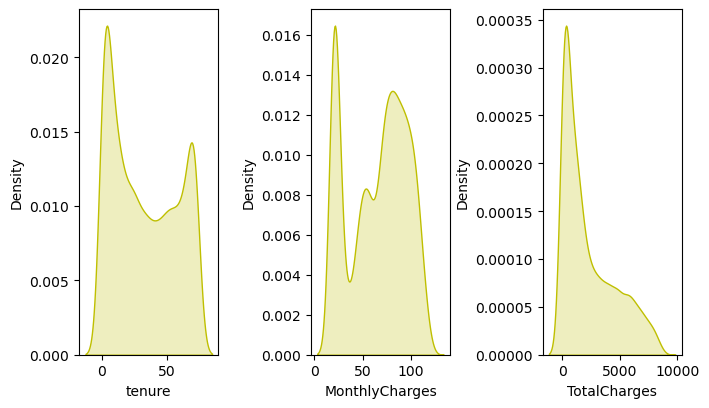

In [49]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [50]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

From the above skew method we can see that some of columns are out of acceptable range +/-.5 . since most of column having catagorical dataset so we dont need to be worried for outlier.

## Using Log Transform method to fix the skewness

In [51]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

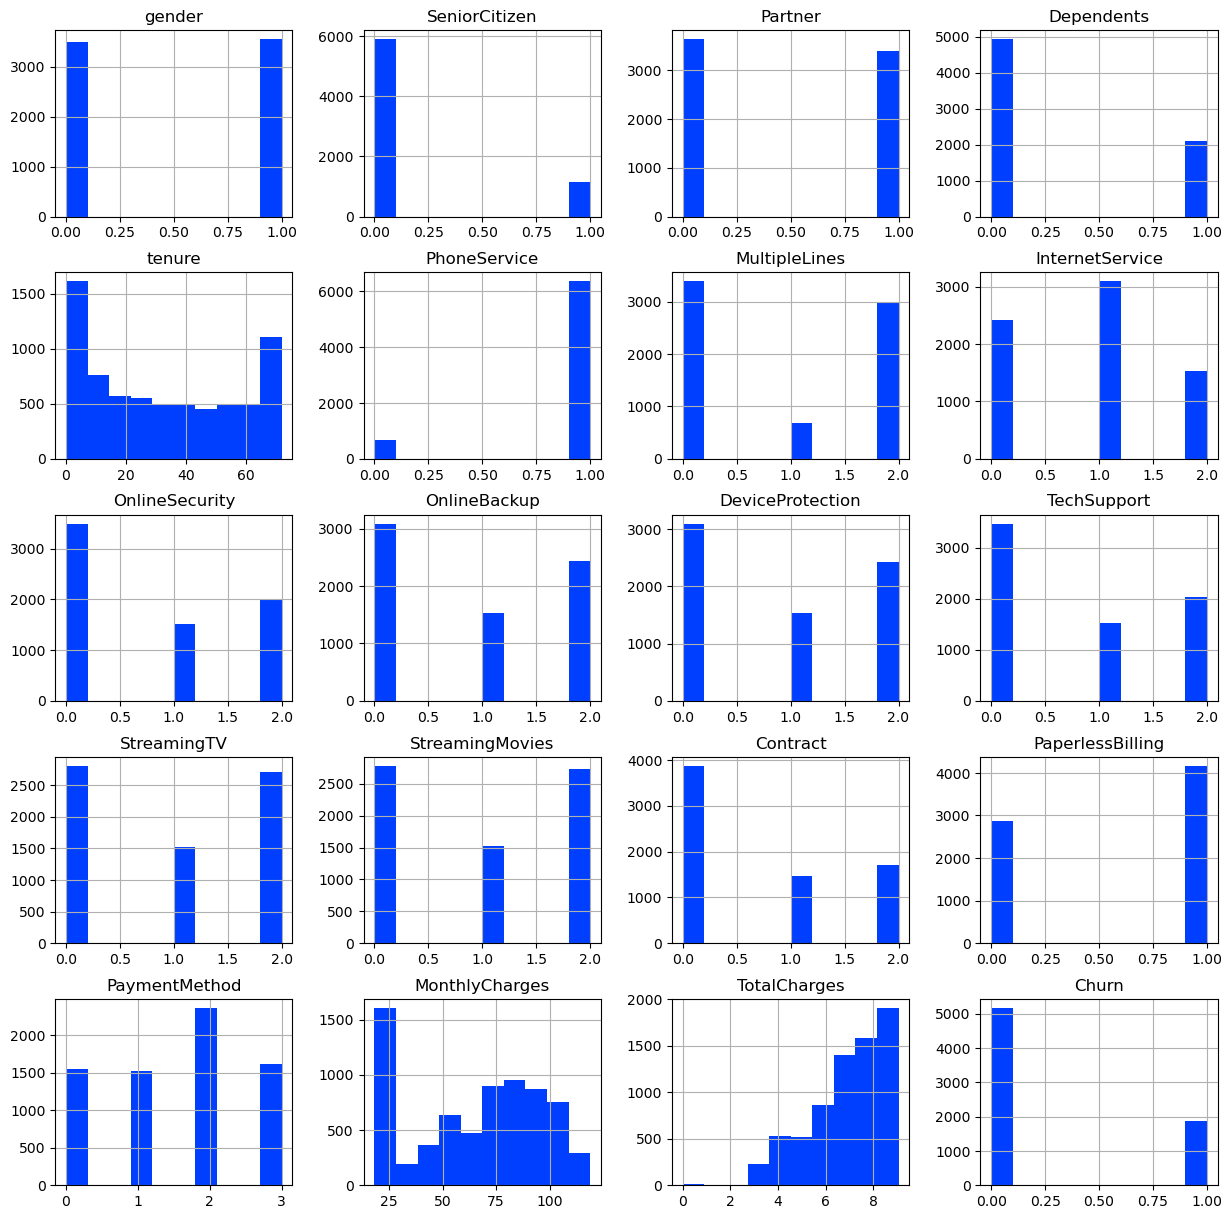

In [52]:
df.hist(figsize=(15,15))
plt.show()

## Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

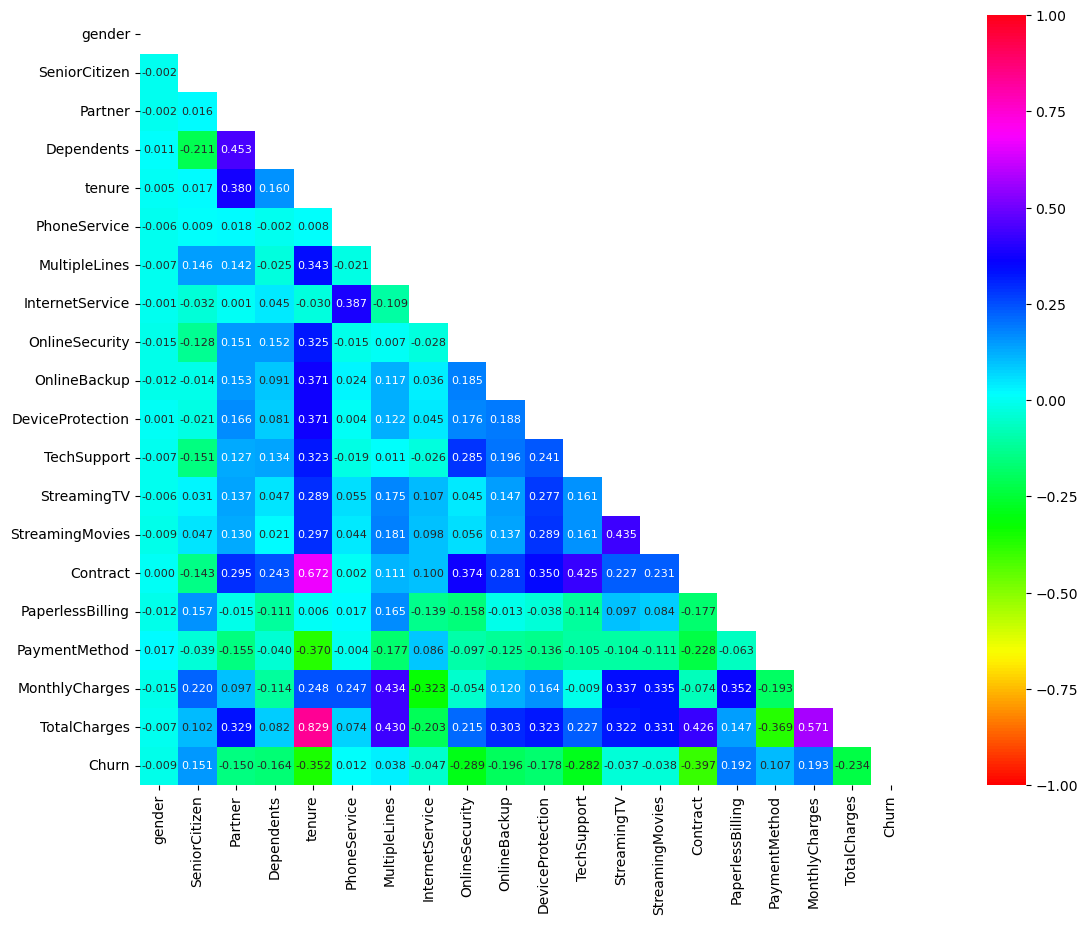

In [53]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="hsv", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the above graph we can see that there is no multicollinearity between two columns.

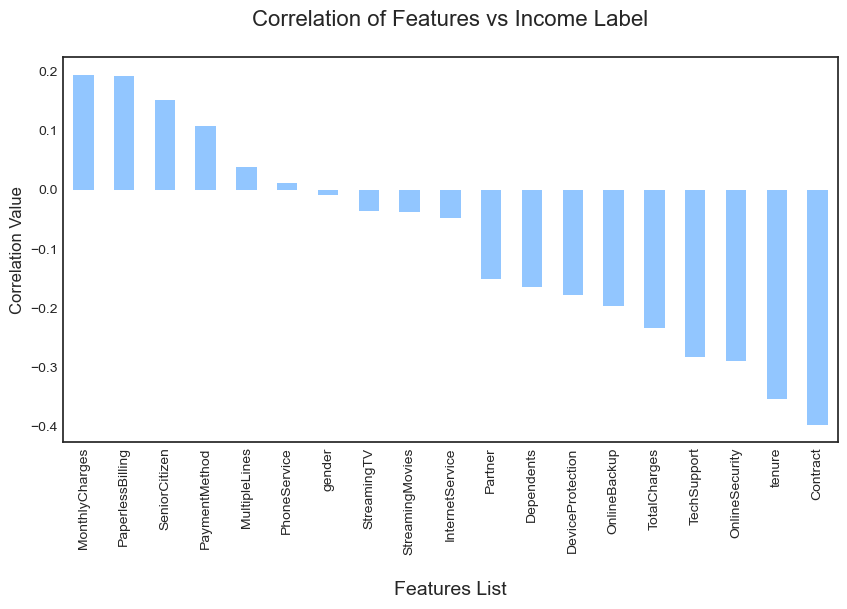

In [54]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since heatmap donot gives us negative or positive information so we have used barplot to look positive or negative value. and more columns are negatively corr to our target than possitively.

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [55]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

## Solving the issue of Class imbalance for out Lable column

In [56]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [57]:
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Feature Scaling

In [58]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.052269,-0.512792,1.179986,-0.603099,-1.110936,-3.120827,0.034110,-1.272609,-0.786507,1.368488,-0.933251,-0.797867,-1.07945,-1.084248,-0.670928,0.770612,0.366047,-1.313266,-2.035822
1,1.039460,-0.512792,-0.917174,-0.603099,0.261265,0.324659,-1.036271,-1.272609,1.645098,-0.931714,1.364133,-0.797867,-1.07945,-1.084248,0.636217,-1.387058,1.380759,-0.375944,0.497298
2,1.039460,-0.512792,-0.917174,-0.603099,-1.069354,0.324659,-1.036271,-1.272609,1.645098,1.368488,-0.933251,-0.797867,-1.07945,-1.084248,-0.670928,0.770612,1.380759,-0.483165,-1.258068
3,1.039460,-0.512792,-0.917174,-0.603099,0.718665,-3.120827,0.034110,-1.272609,1.645098,-0.931714,1.364133,1.624768,-1.07945,-1.084248,0.636217,-1.387058,-1.663378,-0.882651,0.481218
4,-1.052269,-0.512792,-0.917174,-0.603099,-1.069354,0.324659,-1.036271,0.209244,-0.786507,-0.931714,-0.933251,-0.797867,-1.07945,-1.084248,-0.670928,0.770612,0.366047,0.099635,-1.051610


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

## Finding best random state for building our Classification Models

In [59]:
maxAccu=0
maxRS=0
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    accuracy=(accuracy_score(Y_test,pred))*100
     
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i
print('accuracy =',maxAccu, 'best random_state =',maxRS)  

accuracy = 79.59025898724391 best random_state = 800


From this method we have found our best random state for our best classification model.

## Feature importance bar graph¶

,Importance
Features,
Contract,0.144
tenure,0.123
TotalCharges,0.122
MonthlyCharges,0.121
OnlineSecurity,0.063
PaymentMethod,0.062
PaperlessBilling,0.057
TechSupport,0.053
Partner,0.035


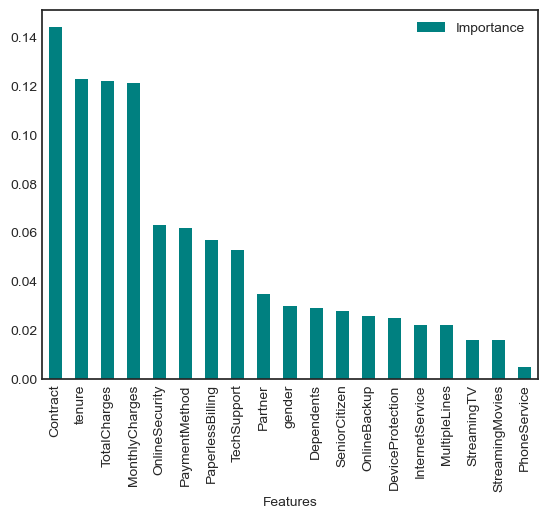

In [60]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

## Machine Learning Model for Classification Model with Evaulution matrics

In [61]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=804)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [62]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1310
           1       0.75      0.82      0.79      1277

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

Accuracy Score: 77.88944723618091
Cross Validation Score: 77.25179379055437

Accuracy Score - Cross Validation Score is 0.6376534456265404


In [63]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1310
           1       0.82      0.86      0.84      1277

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

Accuracy Score: 83.57170467723232
Cross Validation Score: 81.97806590502076

Accuracy Score - Cross Validation Score is 1.5936387722115626


In [64]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1310
           1       0.81      0.84      0.82      1277

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

Accuracy Score: 82.21878623888674
Cross Validation Score: 80.65450181305351

Accuracy Score - Cross Validation Score is 1.5642844258332218


In [65]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1310
           1       0.86      0.87      0.86      1277

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

Accuracy Score: 86.47081561654426
Cross Validation Score: 85.15793062064103

Accuracy Score - Cross Validation Score is 1.3128849959032323


In [66]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      1310
           1       0.72      0.90      0.80      1277

    accuracy                           0.78      2587
   macro avg       0.80      0.78      0.78      2587
weighted avg       0.80      0.78      0.78      2587

Accuracy Score: 78.19868573637417
Cross Validation Score: 77.32918187273367

Accuracy Score - Cross Validation Score is 0.869503863640503


In [67]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1310
           1       0.86      0.87      0.86      1277

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587

Accuracy Score: 86.62543486664089
Cross Validation Score: 85.95023384070814

Accuracy Score - Cross Validation Score is 0.6752010259327506


In [68]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1310
           1       0.87      0.86      0.86      1277

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587

Accuracy Score: 86.54812524159257
Cross Validation Score: 83.95994704436085

Accuracy Score - Cross Validation Score is 2.588178197231727


## Hyper parameter tuning on the best Classification ML Model

In [69]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [10, 42, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [70]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [71]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 42, 1000]})

In [73]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [74]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=100, n_jobs=-2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 86.20023192887516


I have succesfully incorporated with Hyper parameter tuning on my final_model and recieve accuracy rate for it.

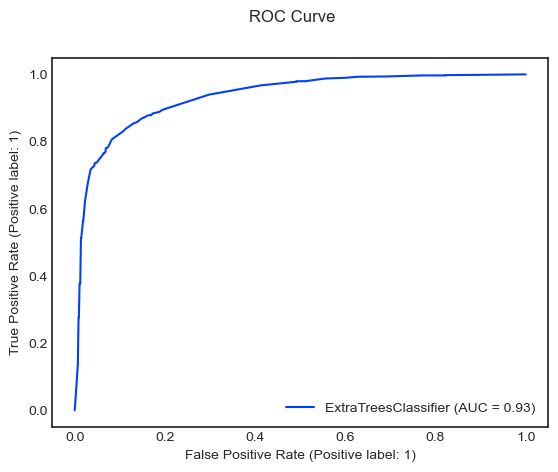

In [75]:
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 93%.

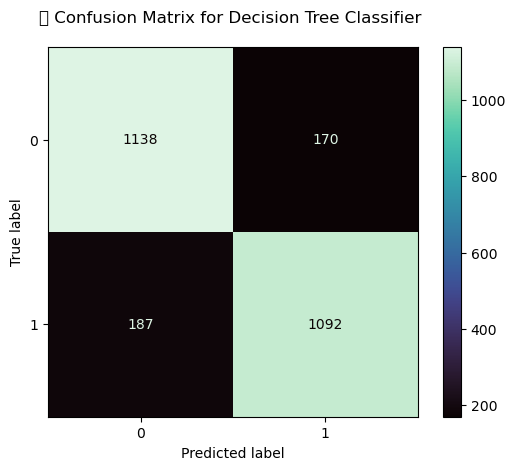

In [76]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

## Saving the model

In [77]:
Filename='Final_Model_07'
joblib.dump(Final_Model,Filename)

['Final_Model_07']